# **Introduction**

In my case studies I keep writing in English because it is used in Kaggle and I also keep them in Portuguese because my native language is Brazilian Portuguese, so we can share more knowledge and experiences in Kaggle with our Brazilian colleagues.

Thank you!!


According to dataset, customer personality analysis helps the company to tailor its product based on its customers from different types of customer segments. For example, instead of spending money to market a new product to each customer in the company's database, a company can analyze which customer segment is most likely to buy the product and then market the product only in that specific segment. .

The case under study has a very broad dataset, but we will divide it into three parts, we will do three independent studies, as there are three very distinct characteristics among the three, one attribute class may influence with its data on the other, which may compromise the algorithm.

In an eventual marketing campaign, the company may use the results of the three together to target the type of product, campaign and offer each customer the best way to purchase.

We'll go a little further using Prophet to forecast sales;

We will be based on the personal attributes of the customers that will relate to the other three classes:

                    Part 1 - clusters and Prophet;
                    Part 2 - Which advertising campaigns did the customer respond to, or not?
                    Part 3 - Forms used for shopping.


# **Introdução**

Em meus casos de estudo mantenho a escrita no idioma inglês por ser o utilizado no Kaggle e os mantenho também em português devido ao fato da minha língua nativa ser o português brasileiro, assim podemos compartilhar mais conhecimento e experiências no Kaggle com nossos colegas brasileiros.

Obigado!!


AConforme dataset a análise da personalidade do cliente ajuda a empresa a adequaer o seu produto com base em seus clientes de diferentes tipos de segmentos de clientes. Por exemplo, em vez de gastar dinheiro para comercializar um novo produto para cada cliente no banco de dados da empresa, uma empresa pode analisar qual segmento de cliente tem maior probabilidade de comprar o produto e, em seguida, comercializar o produto apenas naquele segmento específico.

O caso em em estudo possui um dataset bem amplo, mas nós iremos dividi-lo em três partes, faremos três estudos indepedentes, pois há três caracateristicas bem distintas entre os três, uma classe de atributos poderá influênciar com seus dados na outra, o que poderá comprometer a o algoritimo.

Em uma eventual campanha de marketing poderá a empresa se utilizar dos resultados dos três juntamente para direcionar tipo de produto, campanha e oferecer a melhor forma de compra a ele cada cliente.

Iremos um pouco mais além utilizando o Prophet para fazermos previsões das vendas;

Nós teremos como base os atributos pessoais dos clientes que se relacionará com os outras três classes:

                    Parte 1 - clusters e Prophet;
                    Parte 2 -  Em quais campanhas de publicidade o cliente respondeu, ou não?
                    Parte 3 -  Formas utilizada para compras.

# **Atributos**

# **People**


ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if customer complained in the last 2 years, 0 otherwise


# **Products => Part 1**
MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years


# **Promotion => Part 2**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

# Place => Part 3

NumWebPurchases: Number of purchases made through the company’s web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s web site in the last month Target

# **`Primeira Parte  Clientes x Produtos`**


# **First Party Customers x Products**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px

In [2]:
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Vamos transforma a data de nascimento dos nossos clientes em idade em outra coluna e vamos excluir a coluna 'Year_Birth'.

Vamos trambém transformar a da de registro dos consumirores de objeto para date time 64;


Let's turn our clients' birthdate by age into another column and let's delete the 'Year_Birth' column.

Let's also transform the registration data of the object consumers to date time 64;

In [3]:
from datetime import date
year = date.today().year
age= year - df['Year_Birth'] 
df['Age'] = age


df.Dt_Customer = pd.to_datetime(df.Dt_Customer)


Vamos manter apenas os atributos que podem fazer relação direta entre consumidor e produtos.

We will only keep the attributes that can make a direct relationship between consumers and products.

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40


In [5]:
df = df.drop(columns=["ID", "Year_Birth", 'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	'AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Z_CostContact',	'Z_Revenue',	'Response']) 

Agora possuimos apenas 14 atributos que esão voltados ao perfil dos clientes e o consumo dos produtos.


We now have only 14 attributes that are geared towards customer profile and product consumption

# **Analisando e Tratando os Dados**


# **Analyzing and Handling Data**

In [6]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,64
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,67
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,56
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,37
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,54
2236,PhD,Together,64014.0,2,1,2014-10-06,56,406,0,30,0,0,8,75
2237,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,40
2238,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,65


In [7]:
df.isna().sum(axis=0)

Education            0
Marital_Status       0
Income              24
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
Age                  0
dtype: int64

In [8]:
grafico = px.box(df, y='Income')
grafico.show()

In [9]:
df.query("Income > 140000") 

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
164,PhD,Married,157243.0,0,1,2014-01-03,98,20,2,1582,1,2,1,48
617,PhD,Together,162397.0,1,1,2013-03-06,31,85,1,16,2,1,2,45
655,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,1,1,1,1,1,46
687,PhD,Married,160803.0,0,0,2012-04-08,21,55,16,1622,17,3,4,39
1300,Master,Together,157733.0,1,0,2013-04-06,37,39,1,9,2,0,8,50
1653,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,44
2132,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,72
2233,Graduation,Together,666666.0,1,0,2013-02-06,23,9,14,18,8,1,12,44


In [10]:
df = df.drop([164,617,655,687,1300,1653,2132,2233])

In [11]:
df.isnull().sum()

Education            0
Marital_Status       0
Income              24
Kidhome              0
Teenhome             0
Dt_Customer          0
Recency              0
MntWines             0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
MntGoldProds         0
Age                  0
dtype: int64

In [12]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

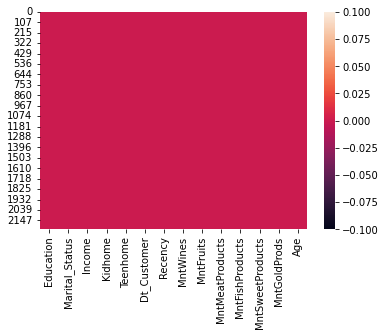

In [13]:
sns.heatmap(df.isnull());

In [14]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,51633.638134,0.444444,0.507168,49.111111,304.930108,26.380376,165.319444,37.644713,27.155466,44.166219,52.207437
std,20601.663123,0.538567,0.544680,28.952893,336.784950,39.821532,219.401447,54.689504,41.325414,52.204505,11.990340
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,35434.750000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,44.000000
50%,51566.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.500000,51.000000
75%,68118.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.250000,50.000000,34.000000,56.250000,62.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,128.000000


In [15]:
grafico = px.box(df, y='Age')
grafico.show()

In [16]:
df.loc[df['Age'] > 81]

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
192,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,121
239,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,128
339,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,122


In [17]:
df = df.drop([192,239,339])

# **Analise dos dados em gráficos**


# **Analysis of data in graphs**

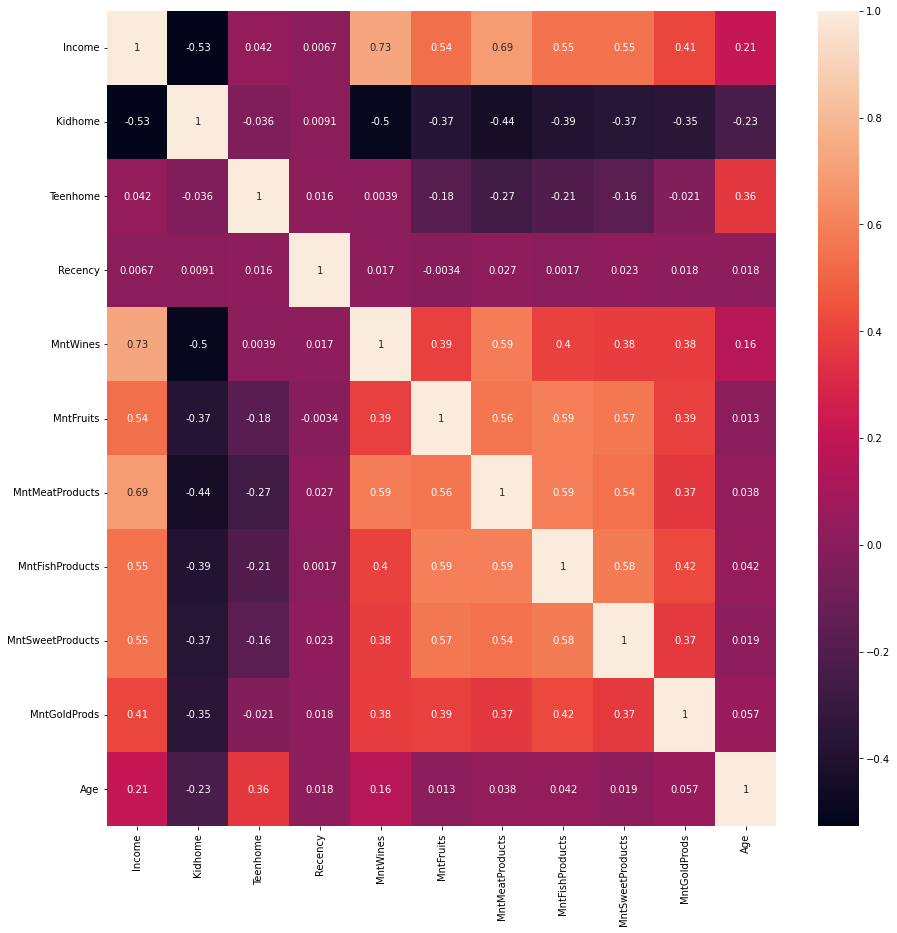

In [18]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(correlations, annot=True)
correlations.round(2);

Em nosso gráfico de correlação podemos observa que a renda influência muito no tipo de produto de consumo, não tendo uma correlaçao forte com filhos, idade e visitas no local.


In our correlation graph we can observe that income influences a lot on the type of consumer product, not having a strong correlation with children, age and visits to the place.

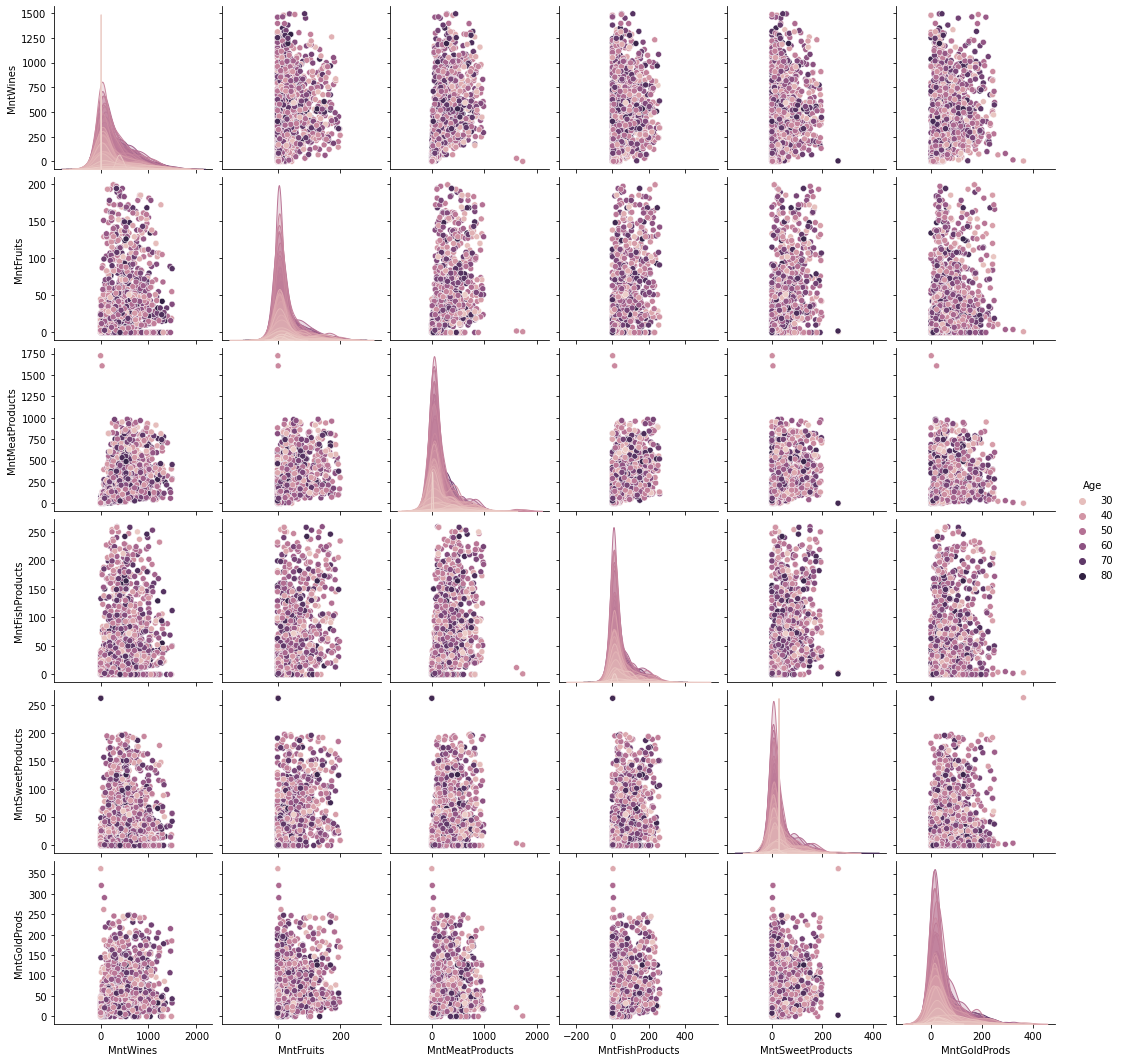

In [19]:
Plot1 = ['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts','MntGoldProds','Age']
sns.pairplot(df[Plot1], hue = 'Age')

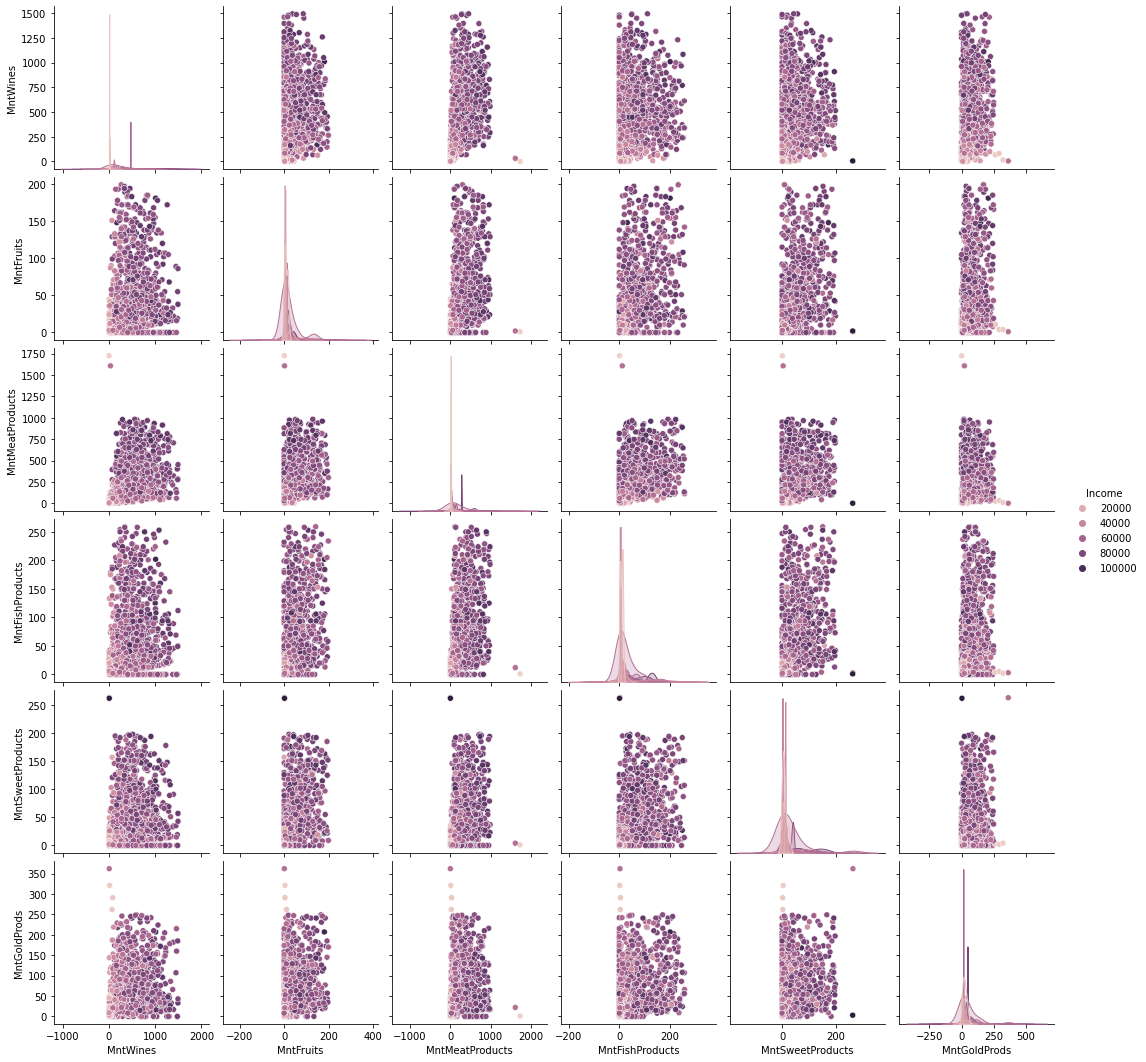

In [20]:
Plot2 = ['MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts','MntGoldProds','Income']

sns.pairplot(df[Plot2], hue = 'Income')

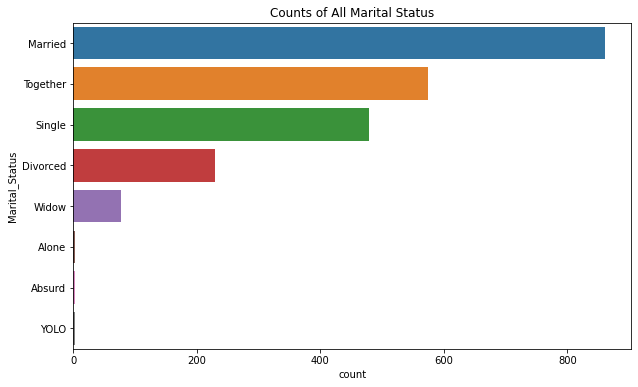

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(y="Marital_Status", data=df, order=df["Marital_Status"].value_counts().index)
plt.title("Counts of All Marital Status");

# **Pré Processamento**


# **Pre-Processing**

In [22]:
mk = LabelEncoder()
df['Education'] = mk.fit_transform(df['Education'])
df['Marital_Status'] = mk.fit_transform(df['Marital_Status'])
df['Dt_Customer'] = mk.fit_transform(df['Dt_Customer'])

In [23]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,2,4,58138.0,0,0,15,58,635,88,546,172,88,88,64
1,2,4,46344.0,1,1,635,38,11,1,6,2,1,6,67
2,2,5,71613.0,0,0,367,26,426,49,127,111,21,42,56
3,2,5,26646.0,1,0,646,26,11,4,20,10,3,5,37
4,4,3,58293.0,1,0,504,94,173,43,118,46,27,15,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,302,46,709,43,182,42,118,247,54
2236,4,5,64014.0,2,1,650,56,406,0,30,0,0,8,75
2237,2,2,56981.0,0,0,509,91,908,48,217,32,12,24,40
2238,3,5,69245.0,0,1,508,8,428,30,214,80,30,61,65


In [24]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df)

In [25]:
type(df_scaled)

numpy.ndarray

In [26]:
min(df_scaled[0]), max(df_scaled[0]) 

(-1.6435862793088722, 2.456789076229536)

In [27]:
df_scaled

array([[-0.3497775 ,  0.25155415,  0.31635257, ...,  1.47202944,
         0.84269024,  1.01571456],
       [-0.3497775 ,  0.25155415, -0.25626678, ..., -0.63299578,
        -0.73182355,  1.27201959],
       [-0.3497775 ,  1.18142842,  0.97058741, ..., -0.14908194,
        -0.04057359,  0.33223448],
       ...,
       [-0.3497775 , -1.60819441,  0.2601782 , ..., -0.36684317,
        -0.38619857, -1.03472567],
       [ 0.5412557 ,  1.18142842,  0.85561687, ...,  0.06867929,
         0.32425278,  1.10114957],
       [ 1.4322889 , -0.67832013,  0.0605334 , ..., -0.63299578,
        -0.44380273,  1.27201959]])

In [28]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)  

In [29]:
print(wcss_1) 

[31206.0, 23488.8024320837, 21012.077029610788, 19774.352103441845, 18844.05690144782, 18132.62861323185, 17630.178383250783, 17184.72177469351, 16796.233532056307]


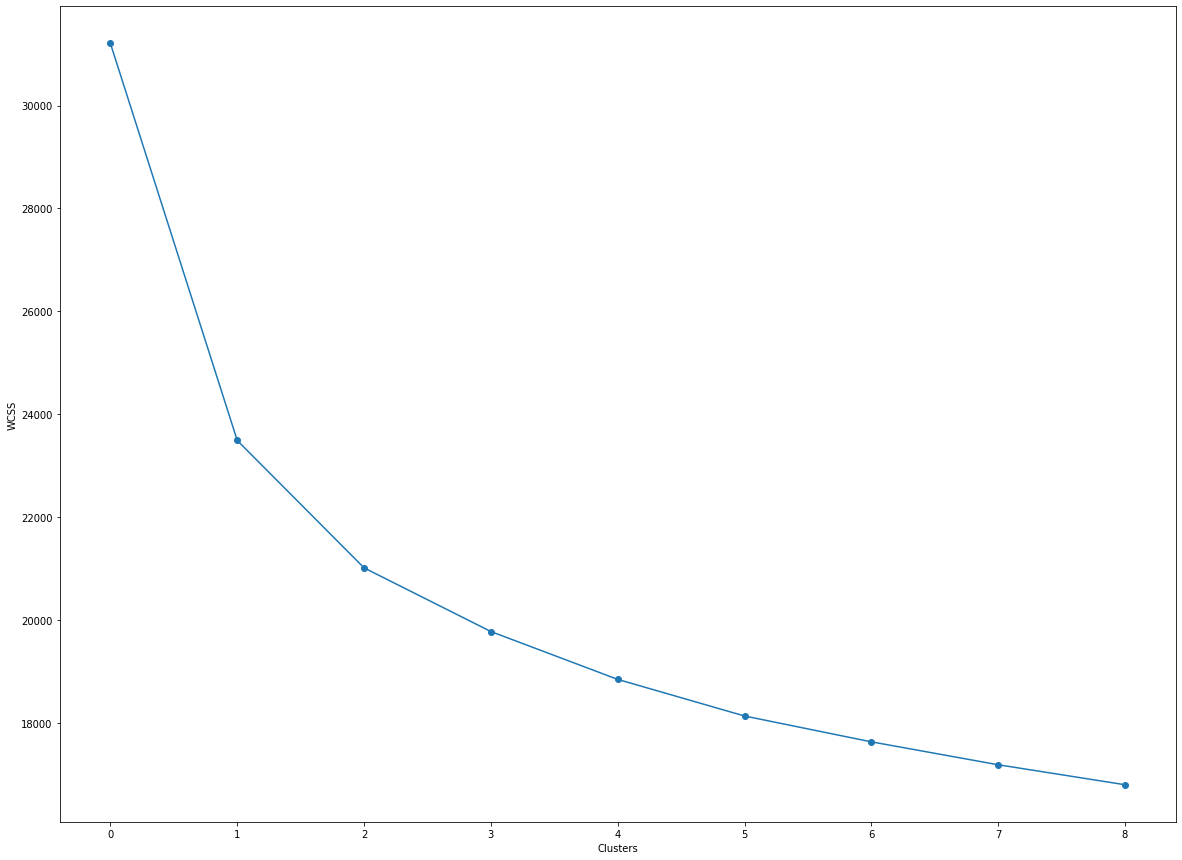

In [30]:
plt.figure(figsize=(20,15))
plt.plot(wcss_1, '-o',)                              
plt.xlabel('Clusters',)
plt.ylabel('WCSS');



In [31]:
kmeans = KMeans(n_clusters=5)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [32]:
labels, len(labels)  

(array([1, 2, 3, ..., 3, 0, 2], dtype=int32), 2229)

In [33]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([564, 317, 400, 342, 606]))

In [34]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,0.272682,0.048762,0.149024,-0.776205,0.855657,-0.012531,-0.023769,0.200240,-0.294337,-0.309013,-0.315014,-0.297388,0.083486,0.549609
1,-0.501562,-0.006581,0.996607,-0.696718,-0.329274,-0.087543,-0.021333,0.506174,1.715985,1.005939,1.670918,1.583696,1.054632,-0.116232
2,0.084601,-0.011135,-0.438884,1.161352,0.987119,0.141511,0.005656,-0.628378,-0.554547,-0.594831,-0.573934,-0.541052,-0.496079,0.314507
3,0.379723,0.036759,1.174459,-0.706139,-0.647124,-0.089758,0.084025,1.311830,0.389724,1.359306,0.530989,0.510994,0.305501,0.188844
4,-0.261556,-0.055335,-1.033145,0.718808,-0.910466,0.014705,-0.017872,-0.776711,-0.477604,-0.613118,-0.501713,-0.482911,-0.474348,-0.764886


In [35]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
0,2.698582,3.781915,54691.612530,0.026596,0.973404,326.171986,48.418440,372.409574,14.647163,97.521277,20.414894,14.870567,48.460993,58.544326
1,1.829653,3.722397,72148.911402,0.069401,0.328076,311.861199,48.488959,475.413249,94.567823,385.873817,129.022082,92.615142,99.037855,50.750789
2,2.487500,3.717500,42582.713667,1.070000,1.045000,355.560000,49.270000,93.425000,4.302500,34.845000,6.255000,4.800000,18.277500,55.792500
3,2.818713,3.769006,75812.056363,0.064327,0.154971,311.438596,51.538012,746.666667,41.842105,463.362573,66.681287,48.280702,60.023392,54.321637
4,2.099010,3.669967,30342.975562,0.831683,0.011551,331.367987,48.589109,43.483498,7.361386,30.834983,10.204620,7.202970,19.409241,43.158416


In [36]:
labels, len(labels)

(array([1, 2, 3, ..., 3, 0, 2], dtype=int32), 2229)

In [37]:
df_mk_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1) # axis=1 colocarmos os labels numa outra coluna;
df_mk_cluster.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,cluster
0,2.0,4.0,58138.0,0.0,0.0,15.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,64.0,1.0
1,2.0,4.0,46344.0,1.0,1.0,635.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,67.0,2.0
2,2.0,5.0,71613.0,0.0,0.0,367.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,56.0,3.0
3,2.0,5.0,26646.0,1.0,0.0,646.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,37.0,4.0
4,4.0,3.0,58293.0,1.0,0.0,504.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,40.0,4.0


findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling

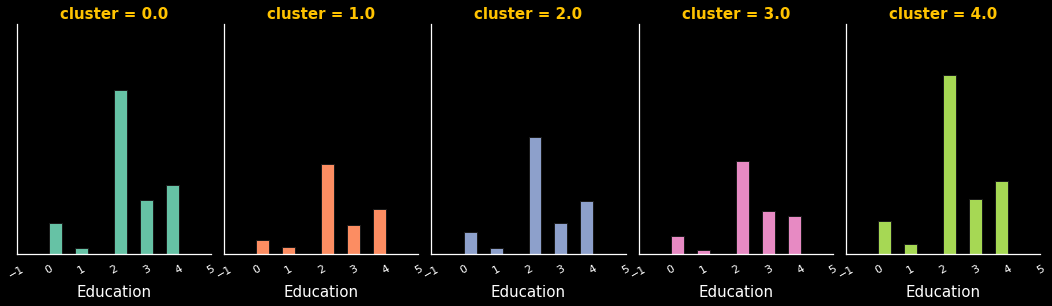

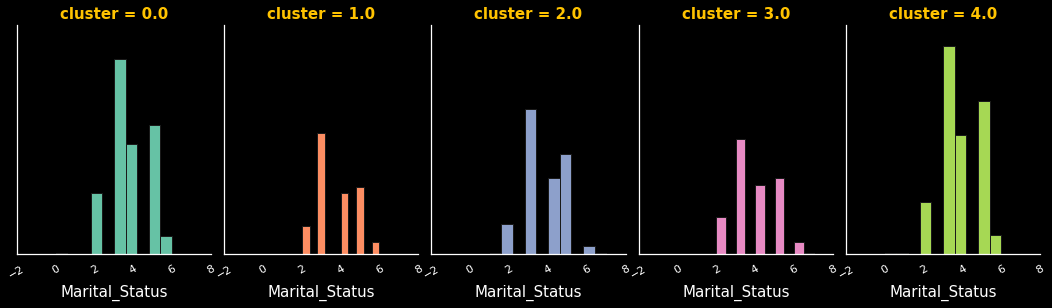

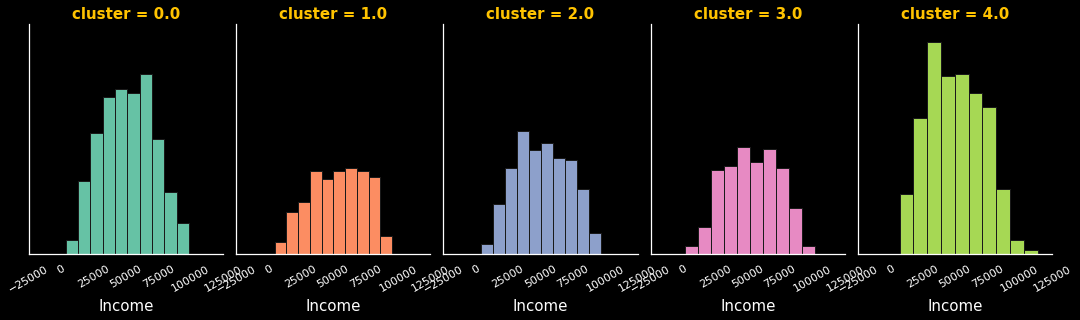

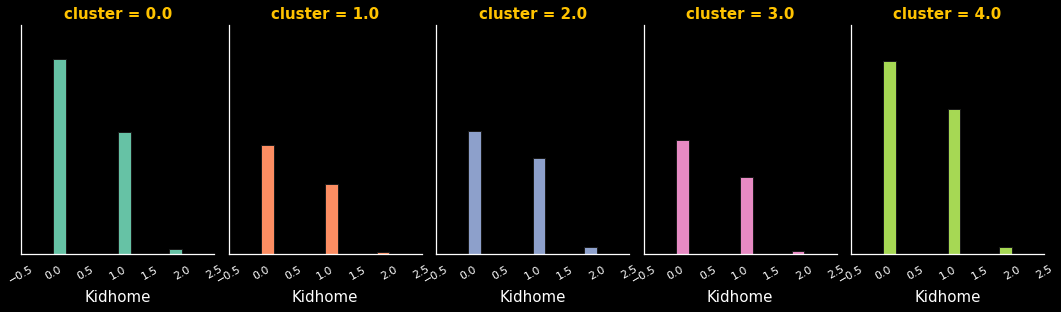

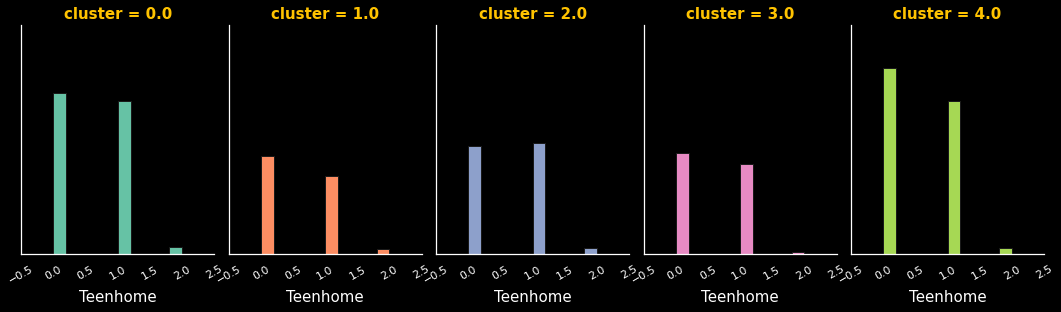

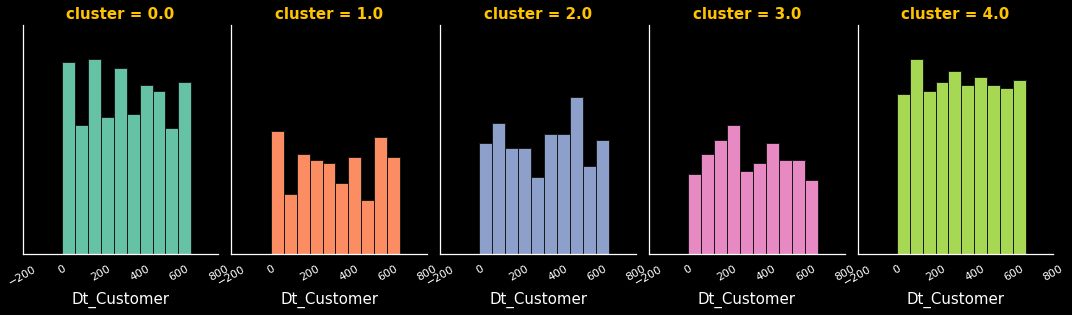

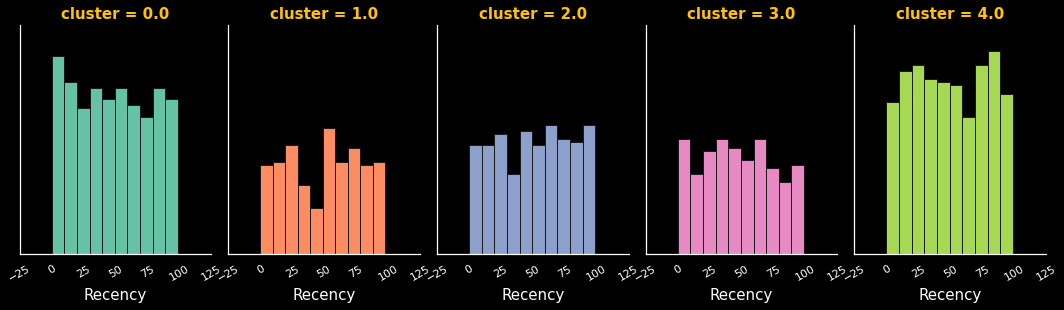

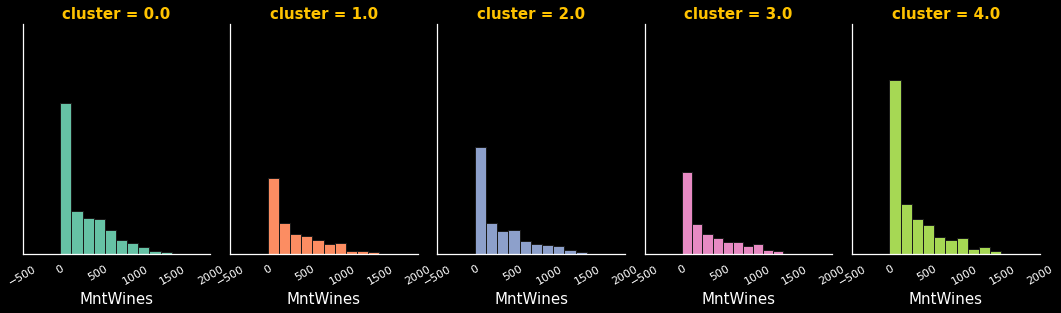

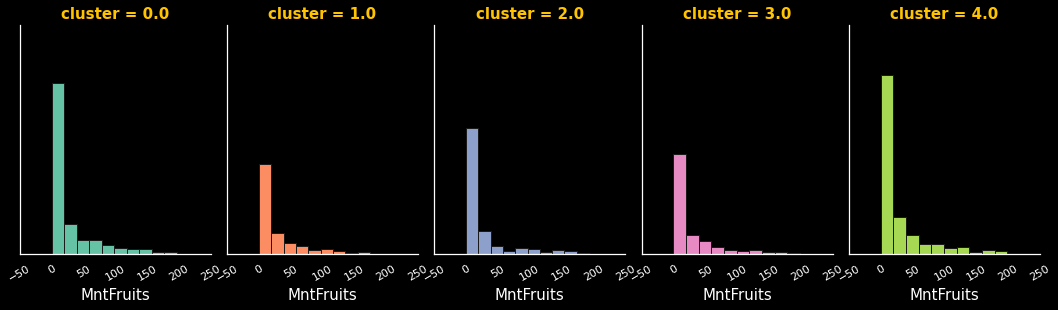

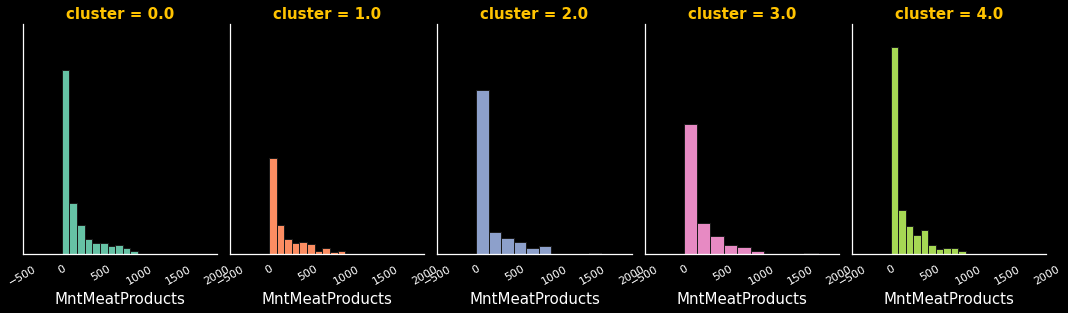

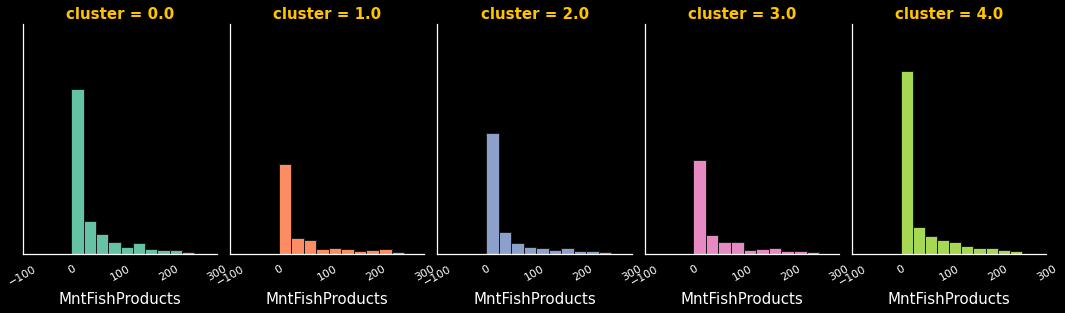

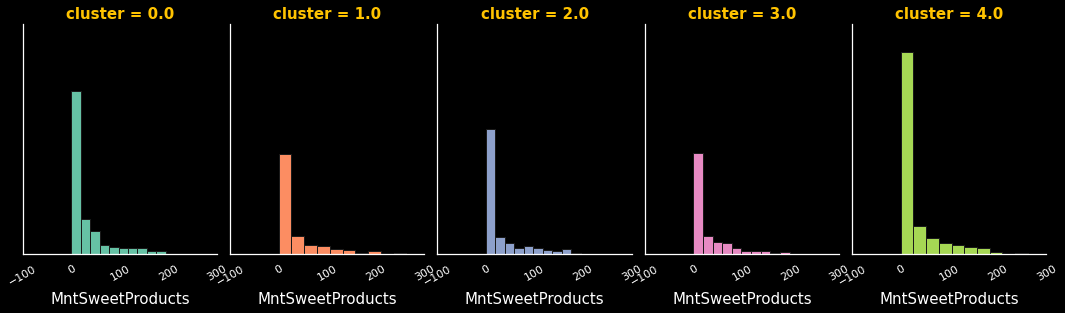

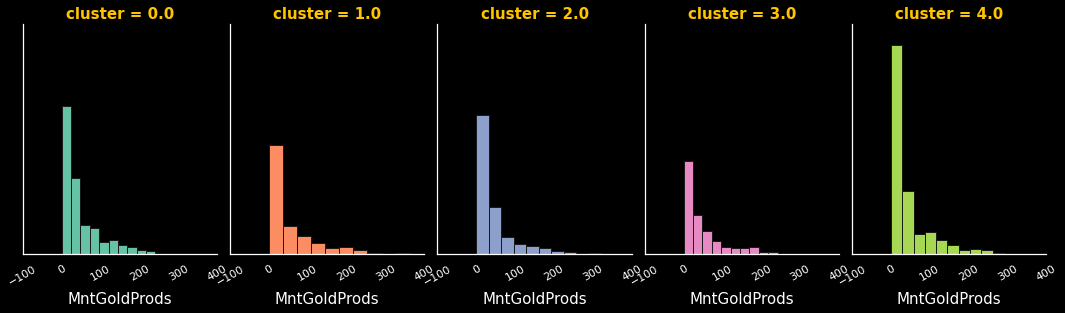

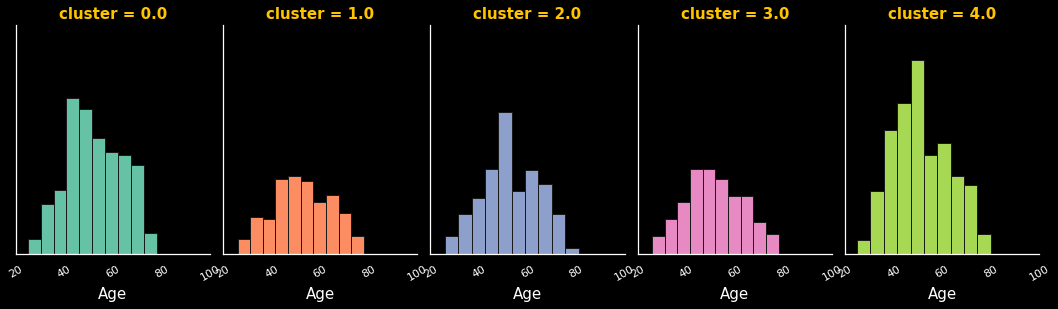

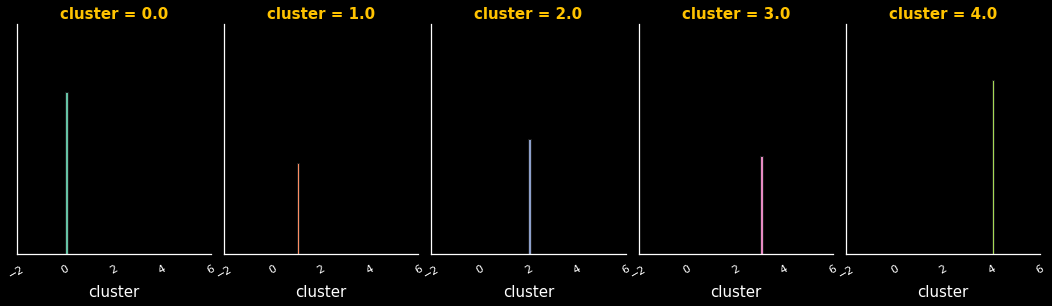

In [38]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False, 'font.family': 'Ubuntu'})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [70]:
cluster_0 = df_mk_cluster.loc[df_mk_cluster['cluster'] ==0]
cluster_1 = df_mk_cluster.loc[df_mk_cluster['cluster'] ==1]
cluster_2 = df_mk_cluster.loc[df_mk_cluster['cluster'] ==2]
cluster_3 = df_mk_cluster.loc[df_mk_cluster['cluster'] ==3]
cluster_4 = df_mk_cluster.loc[df_mk_cluster['cluster'] ==4]

In [71]:
cluster_1['Income'].max()
cluster_4['Income'].max()

113734.0

In [75]:
print('Renda cluster 0: ', cluster_0['Income'].max())
print('Renda cluster 1: ', cluster_1['Income'].max())
print('Renda cluster 2: ', cluster_2['Income'].max())
print('Renda cluster 3: ', cluster_3['Income'].max())
print('Renda cluster 4: ', cluster_4['Income'].max())

Renda cluster 0:  98777.0
Renda cluster 1:  95529.0
Renda cluster 2:  96547.0
Renda cluster 3:  101970.0
Renda cluster 4:  113734.0


In [76]:
print('income cluster 0: ', cluster_0['Income'].max())
print('income cluster 1: ', cluster_1['Income'].max())
print('income cluster 2: ', cluster_2['Income'].max())
print('income cluster 3: ', cluster_3['Income'].max())
print('income cluster 4: ', cluster_4['Income'].max())

income cluster 0:  98777.0
income cluster 1:  95529.0
income cluster 2:  96547.0
income cluster 3:  101970.0
income cluster 4:  113734.0


Com já tinhamos observado no gráfico de correlação, a renda é um fator determinante no consumo dos produtos, sendo ela o parãmetro para classificarmos nosssos clusters.

As we have already seen in the correlation graph, income is a determining factor in the consumption of products, as it is the parameter for classifying our clusters.

Cluster 0 = C

Cluster 1 = E

Cluster 2 = D

Cluster 3 = B

Cluster 4 = A

In [77]:
import matplotlib as mpl


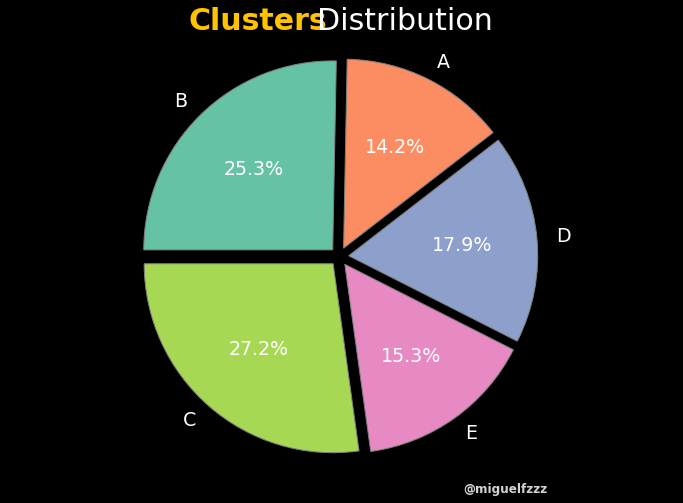

In [81]:
#a Results
clusters_count = df_mk_cluster['cluster'].value_counts()                        # Counting wins-losses-draws
clusters_count = clusters_count.to_frame().reset_index()                      # Convert series to dataframe
clusters_count.columns = ['clusters', 'count']                                # Rename column names
clusters_count = clusters_count.sort_values('clusters', ascending = True)     # Sorting data

labels = [
        "B", 
        "A", 
        "D", 
        "E",
        "C"
        ]

# Visualization
plt.figure(figsize=(12,8))

mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]

plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')

# Title 
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-0.12, 1.2, "Distribution", size=30, color="white")

# Author
plt.text(1.1, -1.25, "@miguelfzzz", fontsize=12, ha="right", color='lightgray', fontweight="bold")

plt.show();

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


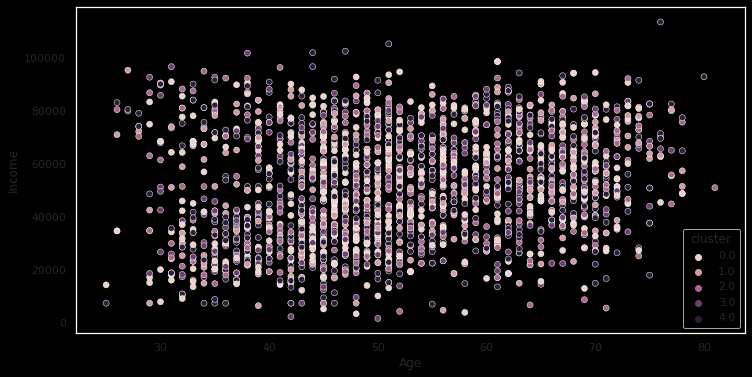

In [41]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(y ='Income',x = 'Age', data = df_mk_cluster, hue= 'cluster')

# **Séries Temporais / Facebook Prophet**

Ousando um pouco mais nesse dataset vamos fazer algumas previsões de vendas, com base no acesso dos clientes ao estabelecimento e sua data de cadastro.



Daring a little more in this dataset, let's make some sales forecasts, based on customer access to the establishment and their registration date.



In [42]:
!pip install fbprophet

In [43]:
from fbprophet import Prophet

In [44]:
df2 = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

In [45]:
df2.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


In [46]:
df2 = df2.drop(df2.columns[[0, 1, 2, 3, 4, 5, 6, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]], axis=1)

In [47]:
df2 

,Dt_Customer,Recency
0,04-09-2012,58
1,08-03-2014,38
2,21-08-2013,26
3,10-02-2014,26
4,19-01-2014,94
...,...,...
2235,13-06-2013,46
2236,10-06-2014,56
2237,25-01-2014,91
2238,24-01-2014,8


In [48]:
df2.describe()

,Recency
count,2240.000000
mean,49.109375
std,28.962453
min,0.000000
25%,24.000000
50%,49.000000
75%,74.000000
max,99.000000


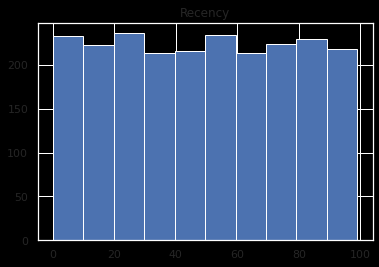

In [49]:
df2.hist();

In [50]:
df2 = df2.sort_values(by = 'Dt_Customer')
df2

,Dt_Customer,Recency
664,01-01-2013,88
1784,01-01-2013,8
1972,01-01-2013,8
1277,01-01-2013,77
742,01-01-2014,79
...,...,...
1097,31-10-2012,71
1694,31-12-2012,70
1202,31-12-2013,42
750,31-12-2013,89


In [51]:
df2= df2[['Dt_Customer', 'Recency']].rename(columns = {'Dt_Customer': 'ds', 'Recency': 'y'})
df2

,ds,y
664,01-01-2013,88
1784,01-01-2013,8
1972,01-01-2013,8
1277,01-01-2013,77
742,01-01-2014,79
...,...,...
1097,31-10-2012,71
1694,31-12-2012,70
1202,31-12-2013,42
750,31-12-2013,89


In [52]:
model = Prophet()
model.fit(df2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future = model.make_future_dataframe(periods=90)  
forecast = model.predict(future)

In [54]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-08,51.309985,15.575309,87.516786,51.309985,51.309985,1.751607,1.751607,1.751607,1.364908,1.364908,1.364908,0.386699,0.386699,0.386699,0.0,0.0,0.0,53.061592
1,2012-01-09,51.305814,14.433211,87.700719,51.305814,51.305814,-2.408656,-2.408656,-2.408656,-2.687934,-2.687934,-2.687934,0.279278,0.279278,0.279278,0.0,0.0,0.0,48.897158
2,2012-01-10,51.301642,10.602699,88.834789,51.301642,51.301642,-0.922150,-0.922150,-0.922150,-1.119905,-1.119905,-1.119905,0.197755,0.197755,0.197755,0.0,0.0,0.0,50.379492
3,2012-01-11,51.297471,16.851123,88.546691,51.297471,51.297471,1.116489,1.116489,1.116489,0.974095,0.974095,0.974095,0.142394,0.142394,0.142394,0.0,0.0,0.0,52.413960
4,2012-01-12,51.293299,13.043249,88.708631,51.293299,51.293299,-1.031289,-1.031289,-1.031289,-1.143644,-1.143644,-1.143644,0.112355,0.112355,0.112355,0.0,0.0,0.0,50.262010


In [82]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
748,2015-03-02,46.517139,6.771911,79.571051,46.517139,46.517140,-2.823971,-2.823971,-2.823971,-2.687934,-2.687934,-2.687934,-0.136037,-0.136037,-0.136037,0.0,0.0,0.0,43.693168
749,2015-03-03,46.512968,9.350984,82.251751,46.512967,46.512969,-1.058401,-1.058401,-1.058401,-1.119905,-1.119905,-1.119905,0.061504,0.061504,0.061504,0.0,0.0,0.0,45.454567
750,2015-03-04,46.508797,6.946659,84.096149,46.508796,46.508797,1.176830,1.176830,1.176830,0.974095,0.974095,0.974095,0.202734,0.202734,0.202734,0.0,0.0,0.0,47.685626
751,2015-03-05,46.504625,11.935956,84.993705,46.504625,46.504626,-0.858439,-0.858439,-0.858439,-1.143644,-1.143644,-1.143644,0.285206,0.285206,0.285206,0.0,0.0,0.0,45.646187
752,2015-03-06,46.500454,13.659097,84.958155,46.500454,46.500455,1.994547,1.994547,1.994547,1.686351,1.686351,1.686351,0.308196,0.308196,0.308196,0.0,0.0,0.0,48.495001


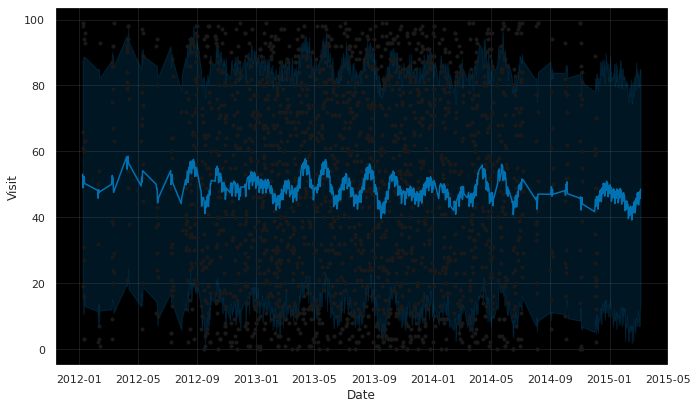

In [56]:
model.plot(forecast, xlabel = 'Date', ylabel = 'Visit');

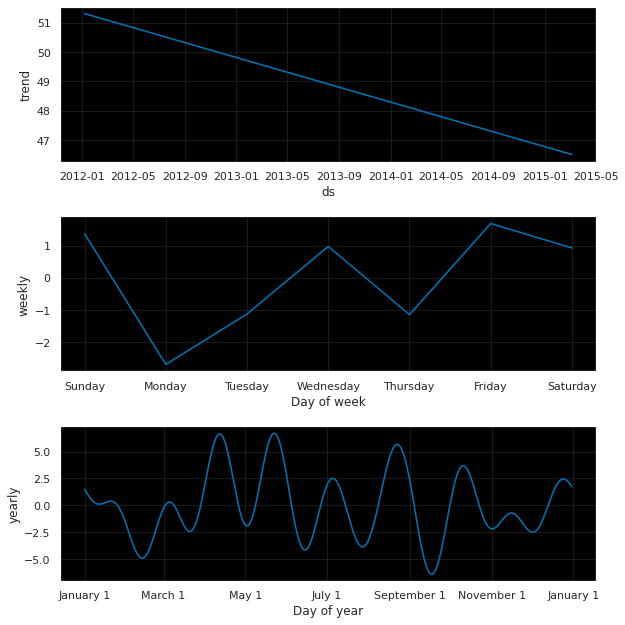

In [57]:
model.plot_components(forecast);

# Nos gráficos acima identificamos uma pequena queda nos negócios de 51 para 47 pontos, sendo os finais de semana o período de maior movimento e quedas em meados de janeiro.


## In the charts above we identify a small drop in trades from 51 to 47 points, with the weekends being the period of busiest movement and falls in mid-January.

In [58]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [59]:
plot_plotly(model, forecast)

In [60]:
plot_components_plotly(model, forecast)

Verificamos uma oscilação nas vendas em formato de ondas, mas essas ondas estão com a tendência de descida nas vendas.

We see a waveform oscillation in sales, but these waves are trending down in sales.